In [1]:
#导入包

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
#读数据
data = pd.read_csv('ex1/ex1data1.txt',names=['population','profit'])
data.head()

,population,profit
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


In [3]:
#查看数据属性
data.describe()

,population,profit
count,97.000000,97.000000
mean,8.159800,5.839135
std,3.869884,5.510262
min,5.026900,-2.680700
25%,5.707700,1.986900
50%,6.589400,4.562300
75%,8.578100,7.046700
max,22.203000,24.147000


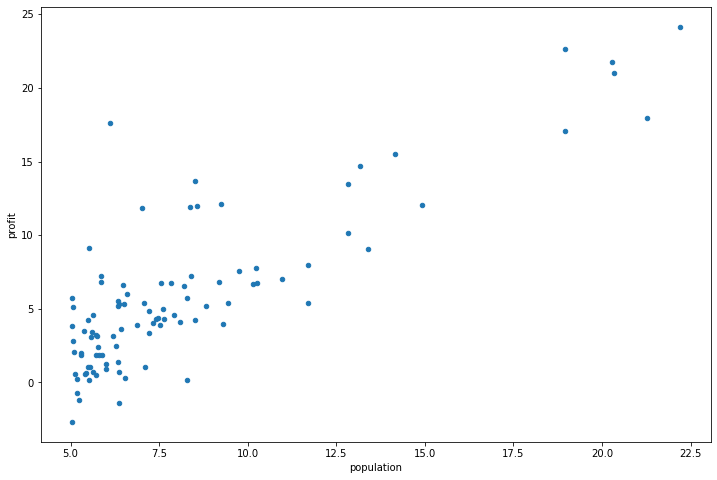

In [4]:
#图形表示数据
data.plot(kind='scatter',x='population',y='profit',figsize=(12,8))
plt.show()

In [5]:
#代价函数
def computeCost(X,y,theta):
    inner = np.power(((X * theta.T) -y),2)
    
    return  np.sum(inner) / (2*len(X))


In [6]:
data.insert(0,'ones',1)
data.head()

,ones,population,profit
0,1,6.1101,17.5920
1,1,5.5277,9.1302
2,1,8.5186,13.6620
3,1,7.0032,11.8540
4,1,5.8598,6.8233


In [7]:
#设置训练集

X= data.loc[:,['ones','population']]
y= data.loc[:,['profit']]

In [8]:
X.head()

,ones,population
0,1,6.1101
1,1,5.5277
2,1,8.5186
3,1,7.0032
4,1,5.8598


In [9]:
y.head()

,profit
0,17.5920
1,9.1302
2,13.6620
3,11.8540
4,6.8233


In [10]:
X = np.matrix(X.values)
y = np.matrix(y.values)

#X = np.array(X.values)
#y = np.array(y.values)

In [11]:
theta = np.matrix(np.array([0,0]))
(X * (theta.T))[:5,:]

matrix([[0.],
        [0.],
        [0.],
        [0.],
        [0.]])

In [12]:
X.shape,theta.shape,y.shape

((97, 2), (1, 2), (97, 1))

In [13]:
computeCost(X,y,theta)

32.072733877455676

# batch gradient decent（批量梯度下降）
$${{\theta }_{j}}:={{\theta }_{j}}-\alpha \frac{\partial }{\partial {{\theta }_{j}}}J\left( \theta  \right)$$

求导后得：

$${{\theta }_{j}}:={{\theta }_{j}}-\alpha\frac{1}{m}\sum\limits_{i=1}^{m}{{{\left(\left( {{h}_{\theta }}\left( {{x}^{(i)}} \right)-{{y}^{(i)}} \right)x_j^{(i)}\right)}}}$$

In [14]:
# batch gradient decent（批量梯度下降）

def gradientDescent(X,y,theta,alpha,iters):
    temp = np.matrix(np.zeros(theta.shape))
    parameters = int(theta.ravel().shape[1]) 
    history_cost = np.zeros(iters) 
    
    for i in range(iters):
        error = (X * theta.T) - y
        
        for j in range(parameters):
            term = np.multiply(error,X[:,j])
            temp[0,j]= theta[0,j] - ((alpha / len(X)) * np.sum(term))
        theta = temp
        history_cost[i] = computeCost(X, y, theta)
            
    return theta,history_cost

In [15]:
#学习速率α和要执行的迭代次数。
alpha = 0.01
iters = 1000

In [16]:
g,history_cost = gradientDescent(X,y,theta,alpha,iters)
g

matrix([[-3.24140214,  1.1272942 ]])

In [17]:
df_history_cost = pd.DataFrame(history_cost)
df_history_cost.describe()

,0
count,1000.000000
mean,4.865067
std,0.371853
min,4.515956
25%,4.572973
50%,4.713383
75%,5.059153
max,6.737190


In [18]:
computeCost(X, y, g)

4.515955503078912

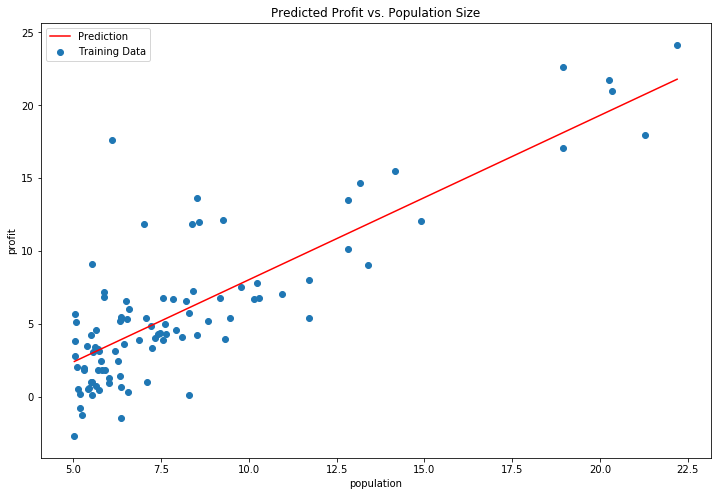

In [19]:
#绘制线性模型以及数据

x = np.linspace(data.population.min(),data.population.max(),100)
f = g[0,0] + (g[0,1] * x)
fig, ax = plt.subplots(figsize=(12,8))
ax.plot(x,f,'r',label='Prediction')
ax.scatter(data.population,data.profit,label='Training Data')
ax.legend(loc=2)
ax.set_xlabel('population')
ax.set_ylabel('profit')
ax.set_title('Predicted Profit vs. Population Size')
plt.show()

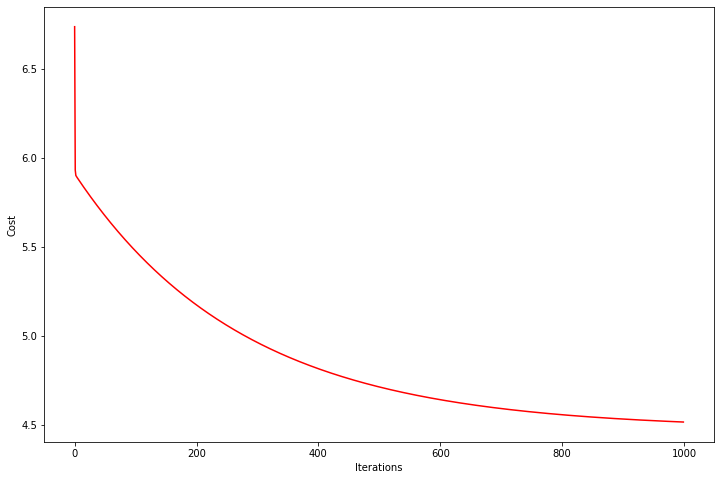

In [20]:
#绘制损失曲线
flg,ax=plt.subplots(figsize=(12,8))
ax.plot(np.arange(iters),history_cost,'r')
ax.set_xlabel('Iterations')
ax.set_ylabel('Cost')

plt.show()

In [21]:
#多变量线性回归

path='ex1/ex1data2.txt'
data2 = pd.read_csv(path,header=None,names=['size','bedrooms','price'])
data2.head()

,size,bedrooms,price
0,2104,3,399900
1,1600,3,329900
2,2400,3,369000
3,1416,2,232000
4,3000,4,539900


In [22]:
#特征归一化
data2 = (data2 - data2.mean()) / data2.std()
data2.head()

,size,bedrooms,price
0,0.130010,-0.223675,0.475747
1,-0.504190,-0.223675,-0.084074
2,0.502476,-0.223675,0.228626
3,-0.735723,-1.537767,-0.867025
4,1.257476,1.090417,1.595389


In [23]:
data2.insert(0,'ones',1)
data2.head()

X2 = data2.loc[:,['ones','size','bedrooms']]
y2 = data2.loc[:,['price']]

In [24]:
X2.head()

,ones,size,bedrooms
0,1,0.130010,-0.223675
1,1,-0.504190,-0.223675
2,1,0.502476,-0.223675
3,1,-0.735723,-1.537767
4,1,1.257476,1.090417


In [25]:
y2.head()

,price
0,0.475747
1,-0.084074
2,0.228626
3,-0.867025
4,1.595389


In [26]:
X2 = np.matrix(X2.values)
y2 = np.matrix(y2.values)

In [27]:
theta2 = np.matrix(np.array([0,0,0]))

In [28]:
g2,history_cost2 = gradientDescent(X2,y2,theta2,alpha,iters)
g2

matrix([[-1.10868761e-16,  8.78503652e-01, -4.69166570e-02]])

In [29]:
computeCost(X2,y2,g2)

0.13070336960771892

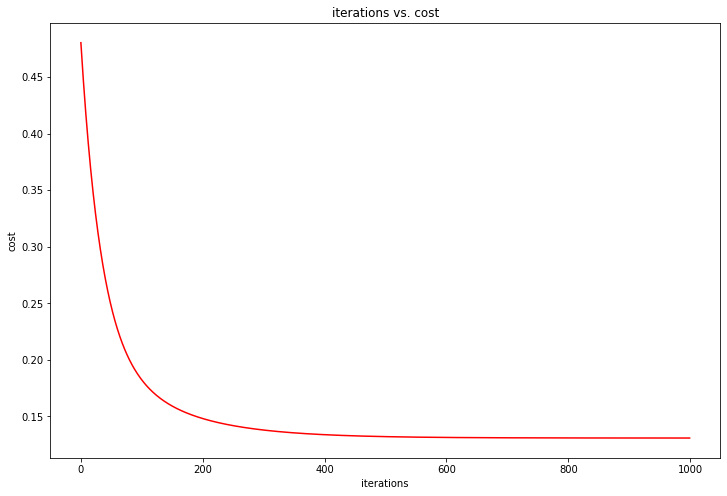

In [30]:
#绘制图形
fig,ax = plt.subplots(figsize=(12,8))
ax.plot(np.arange(iters),history_cost2,'r')
ax.set_xlabel('iterations')
ax.set_ylabel('cost')
ax.set_title('iterations vs. cost')
plt.show()

In [31]:
#scikit-learn model的预测表现
from sklearn import linear_model
model = linear_model.LinearRegression()
model.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

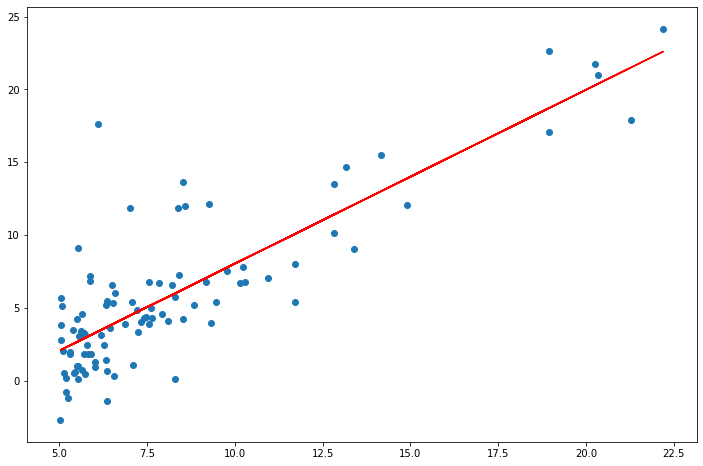

In [32]:
#绘制图形
x = np.array(X[:,1].A1)
f = model.predict(X).flatten()

fig, ax = plt.subplots(figsize=(12,8))
ax.plot(x,f,'r',label='prediction')
ax.scatter(data.population,data.profit,label='Trainning data')

plt.show()

In [33]:
#系数
model.coef_

array([[0.        , 1.19303364]])

In [34]:
#截距
model.intercept_

array([-3.89578088])

In [35]:
#准确率
model.score(X,y)

0.7020315537841397

In [36]:
#计算LinearRegression损失
def compute_linear_model_cost(y_hat,y):
    inner = np.power((y_hat - y),2)
    return np.sum(inner) / (2*len(y))
    

In [37]:

y_hat = model.predict(X)
#cost = compute_linear_model_cost(y_hat,y)
#cost
y_hat.shape

(97, 1)